# Spectrum Normalization

Normalization by base peak intensity is a fundamental processing step in
mass spectrometry. This method scales the peak intensities in a spectrum
such that the highest peak reaches a maximum value, typically set to
one. This approach facilitates the comparison of different spectra by
standardizing the intensity scale.

## Loading the Raw Data

To begin, we need to load the mass spectrometry data. The following
Python code demonstrates how to load a spectrum from an mzML file using
the pyOpenMS library.

In [ ]:
from urllib.request import urlretrieve
import pyopenms as oms
import matplotlib.pyplot as plt

gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(gh + "/src/data/peakpicker_tutorial_1_baseline_filtered.mzML", "tutorial.mzML")

exp = oms.MSExperiment()
oms.MzMLFile().load("tutorial.mzML", exp)

plt.bar(exp.getSpectrum(0).get_peaks()[0], exp.getSpectrum(0).get_peaks()[1], snap=False)
plt.show()

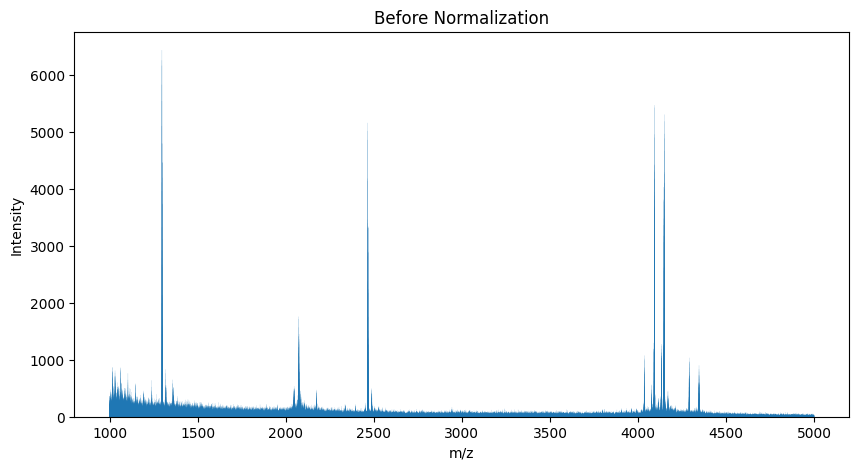

## Normalization Procedure

After loading the data, the next step is to apply normalization. We use
the
[Normalizer](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.Normalizer.html)
class.

In [ ]:
normalizer = oms.Normalizer()
param = normalizer.getParameters()
param.setValue("method", "to_one")
normalizer.setParameters(param)

normalizer.filterPeakMap(exp)
plt.bar(exp.getSpectrum(0).get_peaks()[0], exp.getSpectrum(0).get_peaks()[1], snap=False)
plt.show()

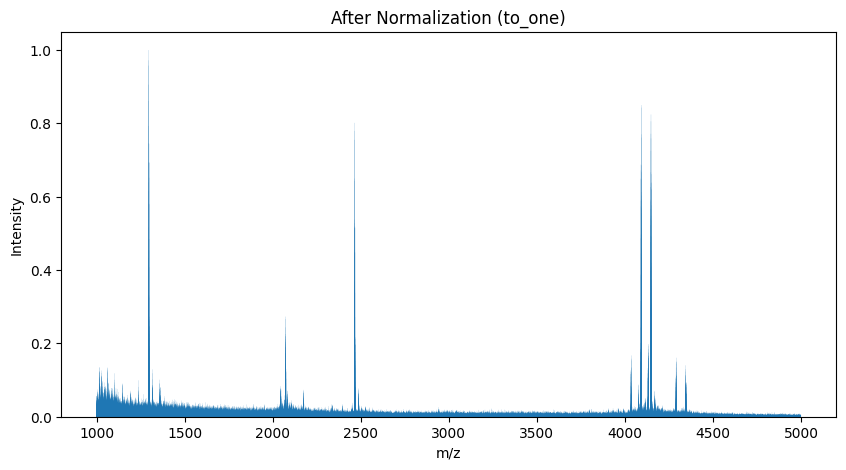

To list all available normalization methods of the
[Normalizer](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.Normalizer.html),
either look into its documentation, or query the valid values of its
<span class="title-ref">method</span> parameter:

In [ ]:
normalizer = oms.Normalizer()
param = normalizer.getParameters()
print(param.getValidStrings("method"))  # [b'to_one', b'to_TIC']

## TIC Normalization

Another approach to normalization is using the Total Ion Count (TIC).
This method adjusts the intensities so that their total sum equals 1.0
in each mass spectrum.

In [ ]:
param.setValue("method", "to_TIC")
normalizer.setParameters(param)
normalizer.filterPeakMap(exp)
plt.bar(exp.getSpectrum(0).get_peaks()[0], exp.getSpectrum(0).get_peaks()[1], snap=False)
plt.show()

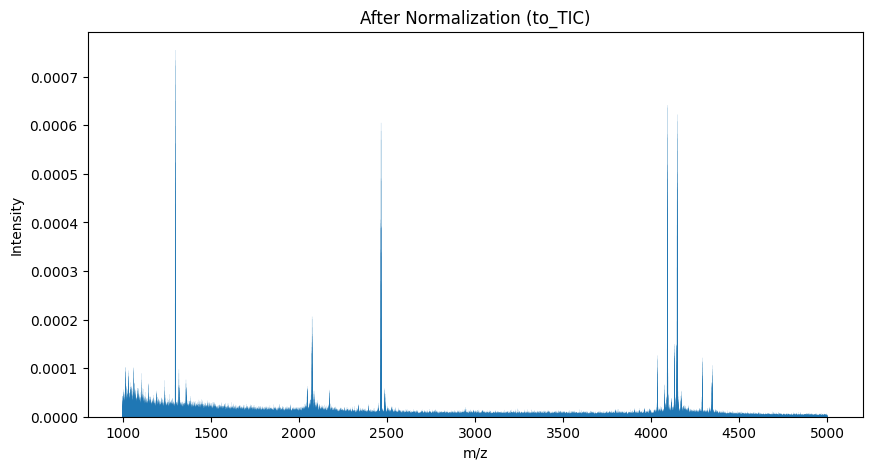